<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/BreastCancer-Detection-using-various-algorithm/blob/main/yolov5_for_person_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15578, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 15578 (delta 81), reused 115 (delta 58), pack-reused 15393
Receiving objects: 100% (15578/15578), 14.58 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (10610/10610), done.
/content/yolov5/yolov5
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="azC4TubgaJeIcnsVXW1A")
project = rf.workspace().project("human-detection-xa5po")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Human-detection-1 in yolov5pytorch:: 100%|██████████| 254/254 [00:00<00:00, 576.36it/s]


In [ ]:
!python train.py --img 416 --batch 16 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --name yolov5_results

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Human-detection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-151-g3e14883 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5

In [ ]:
%cd ..

/content/yolov5


In [ ]:
pwd


'/content/yolov5'

In [ ]:
!python detect.py --weights runs/train/yolov5_results/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/yolov5_results/weights/best.pt'], source=/content/datasets/Human-detection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-151-g3e14883 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/datasets/Human-detection-1/test/images/11_png.rf.f52a6f490880736579e1f43d75b1a7b7.jpg: 416x416 2 persons, 7.4ms
image 2/6 /content/datasets/Human-detection-1/test/images/14_png.rf.ee8115007072973e9b0c19e6de989760.jpg: 416x416

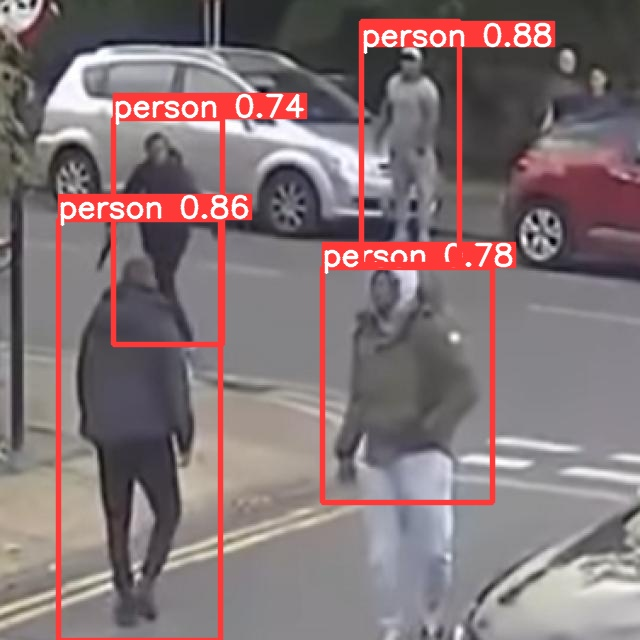

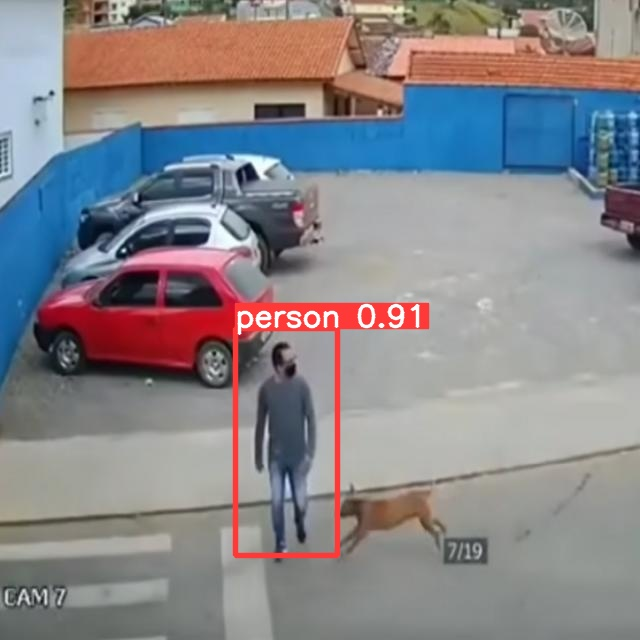

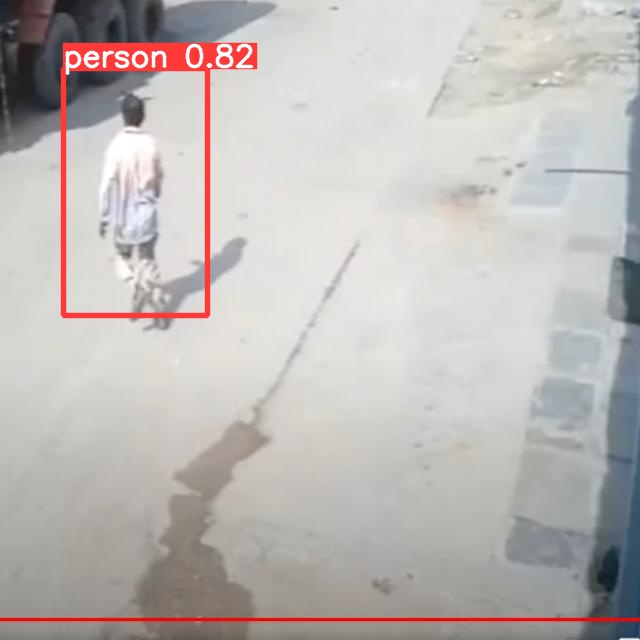

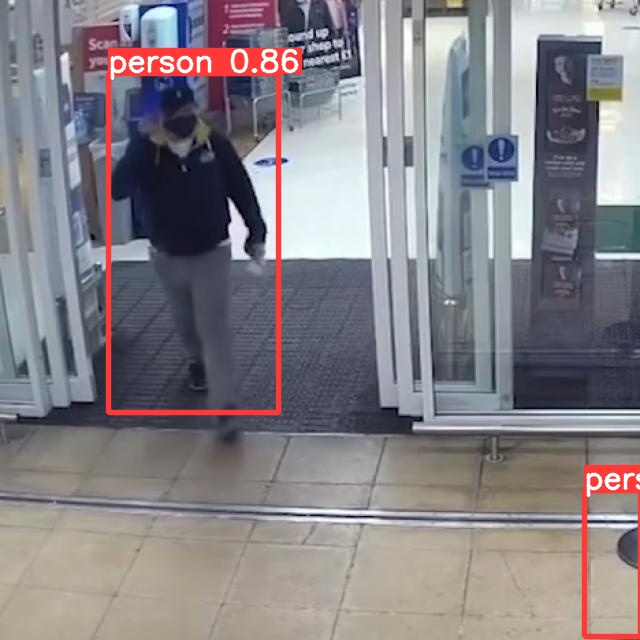

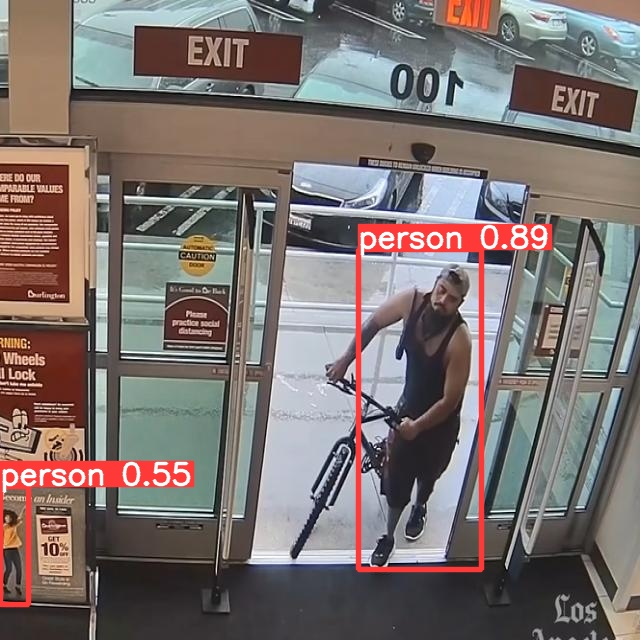

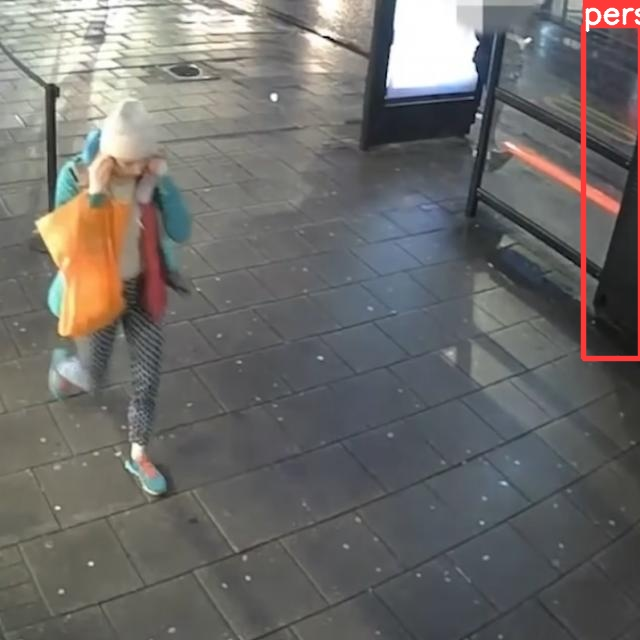

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp6/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")